<a href="https://colab.research.google.com/github/neelkanthrawat/mlph2023-Exercises/blob/main/exercise_sheet_4_ML_and_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import torch

# Task 1:

### 1.(a) Forward and Backward Traces in PyTorch

In [89]:
# Define the function L(x)
def L(x):
    return (torch.sin(x[0]/x[1]) + (x[0]/x[1]) - torch.exp(x[1])) * ((x[0]/x[1]) - torch.exp(x[1]))


# Initialize x
x = torch.tensor([1.5, 0.5], requires_grad=True)

# Forward pass
output = L(x)

# Backward pass
grads = torch.autograd.grad(output, x, create_graph=True)

print("grads are:");print(grads)

# Display the results
print("Forward Trace:")
print("L(x):", output.item())

print("\nBackward Trace:")
print("dL/dx1:", grads[0].tolist()[0])
print("dL/dx2:",grads[0].tolist()[1])

grads are:
(tensor([  3.0118, -13.7240], grad_fn=<AddBackward0>),)
Forward Trace:
L(x): 2.0166468620300293

Backward Trace:
dL/dx1: 3.01184344291687
dL/dx2: -13.723960876464844


In [90]:
### Using 'torch.autograd.grad'
import torch

# Define the function L(x)
def L(x):
    return (torch.sin(x[0]/x[1]) + (x[0]/x[1]) - torch.exp(x[1])) * ((x[0]/x[1]) - torch.exp(x[1]))

# Initialize x
x = torch.tensor([1.5, 0.5], requires_grad=True)

# Compute gradients using torch.autograd.grad
grads = torch.autograd.grad(L(x), x)
print("Gradients using torch.autograd.grad:", grads)

### uncomment the following
print("x.grad in case of 'torch.autograd.grad':",x.grad) ### answer would be None.

### Using 'torch.tensor.backwards'
import torch

# Define the function L(x)
def L(x):
    return (torch.sin(x[0]/x[1]) + (x[0]/x[1]) - torch.exp(x[1])) * ((x[0]/x[1]) - torch.exp(x[1]))

# Initialize x
x = torch.tensor([1.5, 0.5], requires_grad=True)

# Forward pass
output = L(x)

# Backward pass using torch.Tensor.backward
output.backward()
grads = x.grad
print("Gradients using torch.Tensor.backward:", grads)

Gradients using torch.autograd.grad: (tensor([  3.0118, -13.7240]),)
x.grad in case of 'torch.autograd.grad': None
Gradients using torch.Tensor.backward: tensor([  3.0118, -13.7240])


### 1.b.Use pytorch to compute the value of x1 after 2 optimization steps. Train for more epochs to find the
optimal value for x1. Hint: You can now use `torch.Tensor.backward`.

### OPTIMISING STEPS WITH PYTORCH:


In [91]:
import torch.optim as optim
import matplotlib.pyplot as plt

In [92]:
x = torch.tensor([1.5, 0.5], requires_grad=True)
x[0]

tensor(1.5000, grad_fn=<SelectBackward0>)

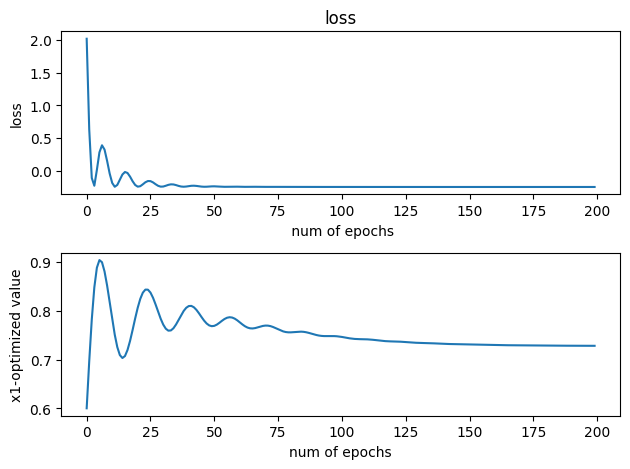

In [93]:
# Create an optimizer (using Adam with a learning rate of 0.1)
optimizer = optim.Adam([x], lr=0.1)

# Training loop (2 optimization steps)

num_epochs=200
loss_list=[];optimized_value_list=[]
for _ in range(num_epochs):
    optimizer.zero_grad()  # Clear previous gradients
    loss = L(x)  # Forward pass
    loss.backward()  # Backward pass
    loss_list.append(loss.item())
    optimizer.step()  # Update parameters
    optimized_value_list.append(x[1].item())

# Display the result for x1 after 2 optimization steps
plt.figure()
plt.subplot(2,1,1)
plt.plot(loss_list)
plt.xlabel(" num of epochs")
plt.ylabel("loss")
plt.title("loss")
plt.subplot(2,1,2)
plt.plot(optimized_value_list)
plt.xlabel("num of epochs")
plt.ylabel("x1-optimized value")
plt.tight_layout()
plt.show()

### 1.c. Use pytorch to compute dL/dx1 for x1 ∈ [0, 2] and visualize the result. Does your result for the optimal x1 agree with what you found in part (b)?



In [94]:
import matplotlib.pyplot as plt

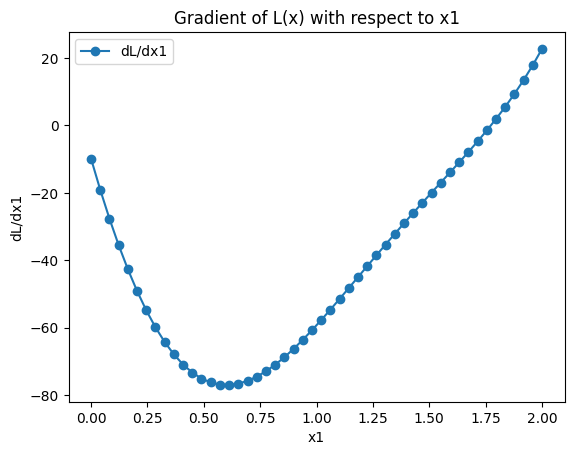

In [95]:
# Create a range of x1 values
x1_values = torch.linspace(0, 2, 50)# one could have also used np.linspace

# Initialize x tensor
x = torch.tensor([1.5, 0.5], requires_grad=True)

# Compute gradients for each x1 value
grad_values = []
for x1 in x1_values:
    x.data[0] = x1
    optimizer.zero_grad()
    loss = L(x)
    loss.backward()
    grad_values.append(x.grad[0].item()) # print x.grad[0]. #The '.item()' method in PyTorch is used to extract a scalar value from a tensor that contains a single element. PyTorch tensors can represent scalars, vectors, matrices, or higher-dimensional arrays. When you have a tensor with only one element, using .item() allows you to obtain the Python scalar value.

# Visualize the result
plt.plot(x1_values.numpy(), grad_values, label='dL/dx1',marker="o")
plt.xlabel('x1')
plt.ylabel('dL/dx1')
plt.title('Gradient of L(x) with respect to x1')
plt.legend()
plt.show()


### Task-2:

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [97]:
# Load the dataset
import requests
from io import BytesIO
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [98]:
# Download and extract the dataset
url = "https://www.thphys.uni-heidelberg.de/~plehn/pics/tutorial-2-data.zip"
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall('/content/tutorial-2-data')

### TASK 2: 2.1 understanding the slicing in this case:

In [99]:
import numpy as np

# Example array
trn_dat = np.array([[[1, 2, 3, 4],  # Event 1: gluon_in,1
                    [5, 6, 7, 8],   # Event 1: gluon_in,2
                    [9, 10, 11, 12],  # Event 1: gamma_out,1
                    [13, 14, 15, 16],  # Event 1: gamma_out,2
                    [17, 18, 19, 20]],  # Event 1: gluon_out,3

                   [[21, 22, 23, 24],  # Event 2: gluon_in,1
                    [25, 26, 27, 28],  # Event 2: gluon_in,2
                    [29, 30, 31, 32],  # Event 2: gamma_out,1
                    [33, 34, 35, 36],  # Event 2: gamma_out,2
                    [37, 38, 39, 40]]])  # Event 2: gluon_out,3


In [100]:
import numpy as np

# Example array
trn_dat = np.array([[[1, 2, 3, 4],  # Event 1: gluon_in,1
                    [5, 6, 7, 8],   # Event 1: gluon_in,2
                    [9, 10, 11, 12],  # Event 1: gamma_out,1
                    [13, 14, 15, 16],  # Event 1: gamma_out,2
                    [17, 18, 19, 20]],  # Event 1: gluon_out,3

                   [[21, 22, 23, 24],  # Event 2: gluon_in,1
                    [25, 26, 27, 28],  # Event 2: gluon_in,2
                    [29, 30, 31, 32],  # Event 2: gamma_out,1
                    [33, 34, 35, 36],  # Event 2: gamma_out,2
                    [37, 38, 39, 40]]])  # Event 2: gluon_out,3

# # Sum along the first axis (axis=0) and the third axis (axis=2)
# sum_px = np.sum(trn_dat[:, :2, [0, 1]], axis=(0, 2))
# print(sum_px)

In [101]:
trn_dat[:,:2,[0]],np.sum(trn_dat[:,:2,[0]],axis=(0,1)),np.sum(trn_dat[:,:2,[0]],axis=(0,2)),np.sum(trn_dat[:,:2,[0]],axis=(1,2))

(array([[[ 1],
         [ 5]],
 
        [[21],
         [25]]]),
 array([52]),
 array([22, 30]),
 array([ 6, 46]))

In [102]:
# (ii) Plot sums of px, py, and pz for incoming particles
sum_px = np.sum(trn_dat[:, :2, [0]], axis=(1, 2))  # Summing up px values for all incoming particles
sum_py = np.sum(trn_dat[:, :2, [1]], axis=(1, 2))  # Summing up py values for all incoming particles
sum_pz = np.sum(trn_dat[:, :2, [2]], axis=(1, 2))  # Summing up pz values for all incoming particles

print(sum_px);print(sum_py);print(sum_pz)

[ 6 46]
[ 8 48]
[10 50]


In [103]:
# load data
trn_dat = np.load('/content/tutorial-2-data/tutorial-2-data/trn_dat.npy')
trn_amp = np.load('/content/tutorial-2-data/tutorial-2-data/trn_amp.npy')

val_dat = np.load('/content/tutorial-2-data/tutorial-2-data/val_dat.npy')
val_amp = np.load('/content/tutorial-2-data/tutorial-2-data/val_amp.npy')

tst_dat = np.load('/content/tutorial-2-data/tutorial-2-data/tst_dat.npy')
tst_amp = np.load('/content/tutorial-2-data/tutorial-2-data/tst_amp.npy')

print(f"train data shape: {trn_dat.shape}")
print(f"train amp  shape: {trn_amp.shape}")
print(f"test  data shape: {tst_dat.shape}")
print(f"test  amp  shape: {tst_amp.shape}")
print(f"val   data shape: {val_dat.shape}")
print(f"val   amp  shape: {val_amp.shape}")

train data shape: (30000, 5, 4)
train amp  shape: (30000,)
test  data shape: (30000, 5, 4)
test  amp  shape: (30000,)
val   data shape: (30000, 5, 4)
val   amp  shape: (30000,)


sum_px:
[0. 0. 0. ... 0. 0. 0.]
sum_py:
[0. 0. 0. ... 0. 0. 0.]
sum_pz:
[ 70.03082435  98.99759191 168.65944283 ...  48.18730824  32.03292928
 135.54679612]


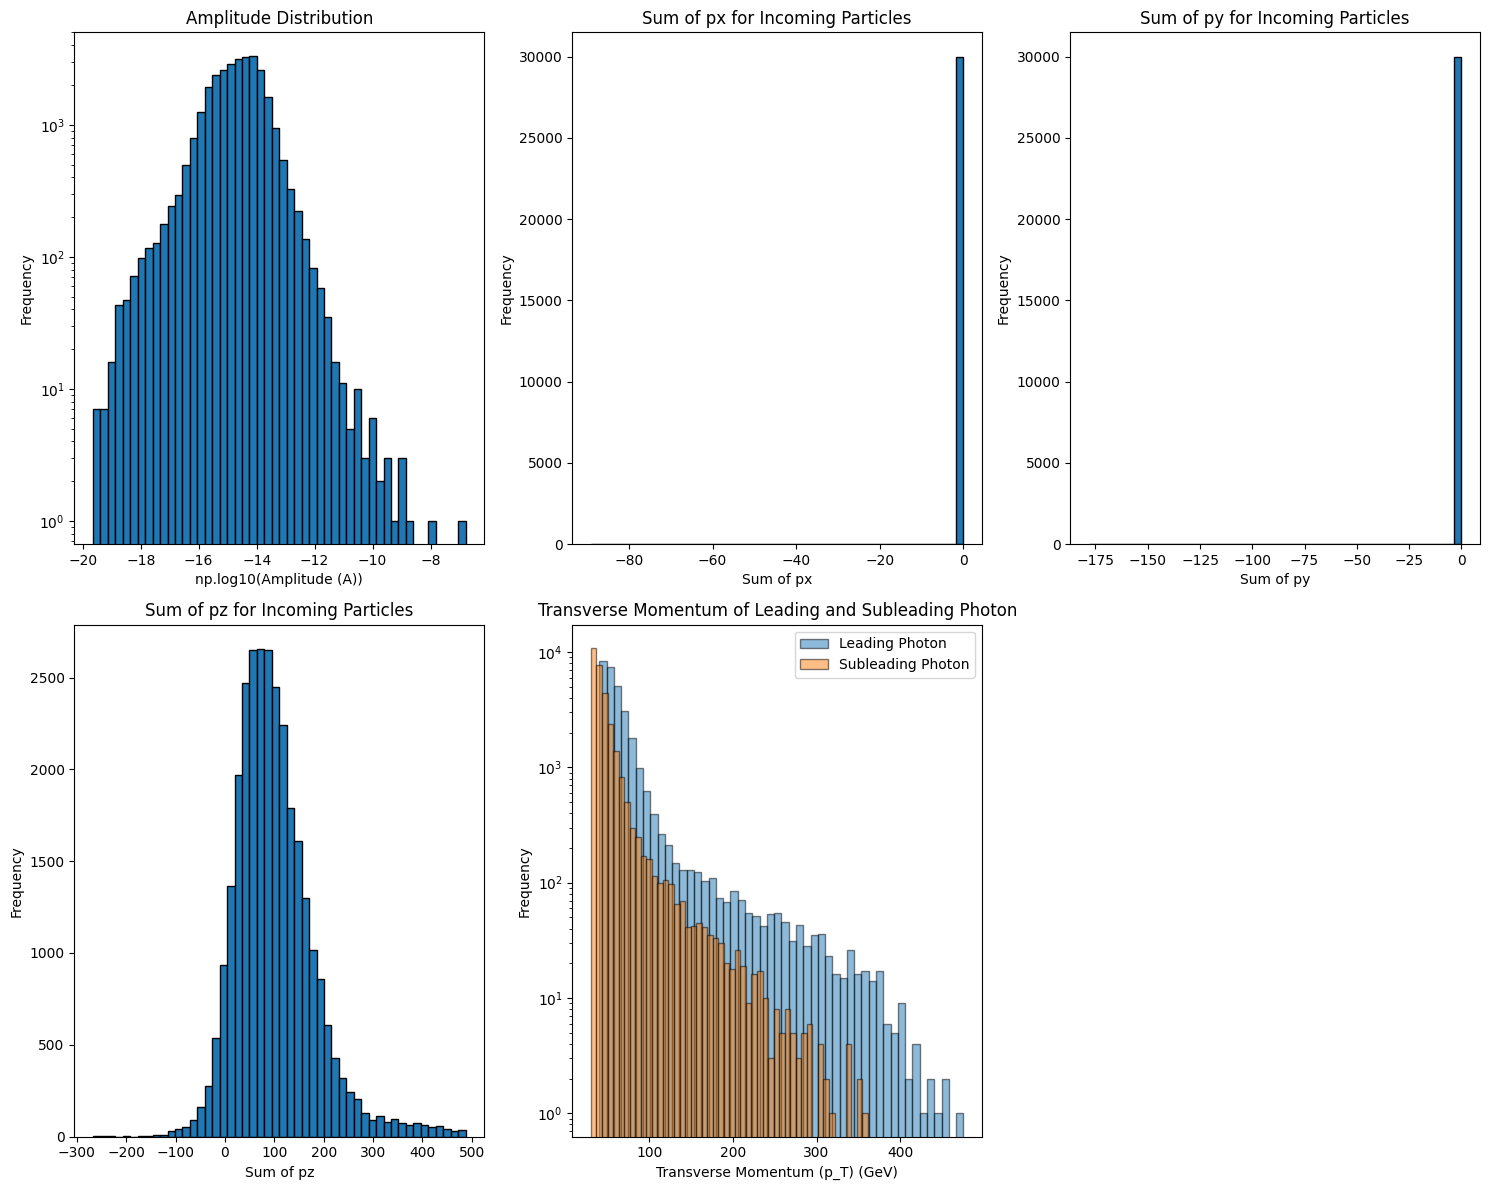

In [104]:
# Define labels and indices for accessing momenta components
momenta_labels = ['gin,1', 'gin,2', 'γout,1', 'γout,2', 'gout,3']
px_indices = [0, 1, 2]  # Indices for px in the momenta

# Initialize plot
plt.figure(figsize=(15, 12))

# (i) Plot Amplitude (A)
plt.subplot(2, 3, 1)
plt.yscale("log")
plt.hist(np.log(trn_amp), bins=50, edgecolor='black')
plt.title('Amplitude Distribution')
plt.xlabel('np.log10(Amplitude (A))')
plt.ylabel('Frequency')

# (ii) Plot sums of px, py, and pz for incoming particles
sum_px = np.sum(trn_dat[:, :2, [1]], axis=(1, 2))  # Summing up px values for all incoming particles
print("sum_px:");print(sum_px)
sum_py = np.sum(trn_dat[:, :2, [2]], axis=(1, 2))  # Summing up py values for all incoming particles
print("sum_py:");print(sum_py)
sum_pz = np.sum(trn_dat[:, :2, [3]], axis=(1, 2))  # Summing up pz values for all incoming particles
print("sum_pz:");print(sum_pz)

# Plot sum of px
plt.subplot(2, 3, 2)
plt.hist(sum_px, bins=50, edgecolor='black')
plt.title('Sum of px for Incoming Particles')
plt.xlabel('Sum of px')
plt.ylabel('Frequency')

# Plot sum of py
plt.subplot(2, 3, 3)
plt.hist(sum_py, bins=50, edgecolor='black')
plt.title('Sum of py for Incoming Particles')
plt.xlabel('Sum of py')
plt.ylabel('Frequency')

# Plot sum of pz
plt.subplot(2, 3, 4)
plt.hist(sum_pz, bins=50, edgecolor='black')
plt.title('Sum of pz for Incoming Particles')
plt.xlabel('Sum of pz')
plt.ylabel('Frequency')

# (iii) Plot Transverse Momentum (p_T) of the leading and subleading photon
pt_leading = np.sqrt(trn_dat[:, 2, 1] ** 2 + trn_dat[:, 2, 2] ** 2)  # Calculating p_T of the leading photon
pt_subleading = np.sqrt(trn_dat[:, 3, 1] ** 2 + trn_dat[:, 3, 2] ** 2)  # Calculating p_T of the subleading photon

# Plot p_T of leading and subleading photons
plt.subplot(2, 3, 5)
plt.yscale("log")
plt.hist(pt_leading, bins=50, edgecolor='black', alpha=0.5, label='Leading Photon')
plt.hist(pt_subleading, bins=50, edgecolor='black', alpha=0.5, label='Subleading Photon')
plt.title('Transverse Momentum of Leading and Subleading Photon')
plt.xlabel('Transverse Momentum (p_T) (GeV)')
plt.ylabel('Frequency')
plt.legend()

# (iv) Plot Missing Transverse Energy
### This is incorrect:
# missing_energy = np.sqrt((sum_px - trn_dat[:, 2, 1]) ** 2 + (sum_py - trn_dat[:, 2, 2]) ** 2)  # Calculating Missing Transverse Energy

# # Plot Missing Transverse Energy
# plt.subplot(2, 3, 6)
# plt.hist(missing_energy, bins=50, edgecolor='black')
# plt.title('Missing Transverse Energy')
# plt.xlabel('Missing Transverse Energy')
# plt.ylabel('Frequency')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


# Task-2-(2)

### Preprocessing the data

In [105]:
import torch
from torch.utils.data import Dataset, DataLoader

In [106]:
### Come up with a (bijective) proprocessing to transform the tensor into O(1) numbers:

def preprocessing_1_min(x):
        max_original_value = torch.max(x)
        normalized_sample = x / max_original_value
        return normalized_sample, max_original_value

def inverse_preprocessing_1_min(x_preprocessed, max_original_val):
  original_val_x=max_original_val*x_preprocessed
  return original_val_x

### 2nd type of preprocessing: taking mean of the dataset and working with it
def preprocess_x(x_in, mean=None, std=None):
    x = x_in.copy() # do not overwrite
    if mean is None or std is None:
        mean = x.mean(keepdims=True)
        std = x.std(keepdims=True)
    x = (x - mean) / std # standardize
    assert np.isfinite(x).all() # check for nans and infs
    return torch.Tensor(x).float(), mean, std # create torch tensors

def preprocess_A(A_in, mean=None, std=None):
    A = A_in.copy()
    A = np.log(A)
    if mean is None or std is None:
        mean = A.mean(keepdims=True)
        std = A.std(keepdims=True)
    A = (A - mean) / std
    assert np.isfinite(A).all()
    return torch.tensor(A).float().unsqueeze(-1), mean, std

def undo_preprocess_A(A_in, mean, std):
    A = A_in.copy()
    A = A * std + mean
    A = np.exp(A)
    return A

In [107]:
# flatten datasets
nev = trn_dat.shape[0]
trn_datf = np.reshape(trn_dat, (nev, -1))
val_datf = np.reshape(val_dat, (nev, -1))
tst_datf = np.reshape(tst_dat, (nev, -1))

In [108]:
# create datasets and dataloaders
trn_datfp, mean_x, std_x = preprocess_x(trn_datf)
val_datfp, _, _ = preprocess_x(val_datf, mean_x, std_x)
tst_datfp, _, _ = preprocess_x(tst_datf, mean_x, std_x)

trn_ampp, mean_A, std_A = preprocess_A(trn_amp)
val_ampp, _, _ = preprocess_A(val_amp, mean_A, std_A)
tst_ampp, _, _ = preprocess_A(tst_amp, mean_A, std_A)

In [109]:
# check that network inputs are O(1)
# plt.hist(trn_datfp, range=(-5,5), alpha=.5, bins=50)
# plt.hist(trn_ampp, range=(-5,5), alpha=.5, bins=50)
# plt.show()

In [110]:
class amp_dataset(torch.utils.data.Dataset):

    def __init__(self, data, amp):
        self.data = data
        self.amp = amp

    def __len__(self):
        return len(self.amp)

    def __getitem__(self, idx):
        return self.data[idx], self.amp[idx]

In [111]:
trn_dataset = amp_dataset(trn_datfp, trn_ampp)
val_dataset = amp_dataset(val_datfp, val_ampp)
tst_dataset = amp_dataset(tst_datfp, tst_ampp)

batch_size = 64
trn_dataloader = torch.utils.data.DataLoader(trn_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
tst_dataloader = torch.utils.data.DataLoader(tst_dataset, batch_size=batch_size, shuffle=False)

In [112]:
# import torch.nn as nn

In [113]:
# trn_datfp, trn_ampp

In [114]:
# for x,y in trn_dataloader:
#   print("x is:");print(x)
#   print("y is:"); print(y)

In [115]:
# trn_dataset.data,trn_dataset.amp

In [147]:
class amp_net(nn.Module):

    def __init__(self, hdn_dim=32, ipt_dim=20, opt_dim=1, n_layers=2, dropout=0.0):
        super(amp_net, self).__init__()

        assert n_layers>=2

        layers = []
        layers.append(nn.Linear(ipt_dim, hdn_dim))
        layers.append(nn.ReLU())
        for _ in range(n_layers-2):
            layers.append(nn.Linear(hdn_dim, hdn_dim))
            ###
            if dropout>0.:
                layers.append(nn.Dropout(p=dropout))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hdn_dim, opt_dim))

        self.linear_relu_stack = nn.Sequential(*layers)

    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out

In [117]:
model = amp_net(hdn_dim=32, n_layers=4)
print(model)
total_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model has {total_parameters:d} trainable parameters")

amp_net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)
Model has 2817 trainable parameters


In [118]:
# get the first batch:
x, A = next(iter(trn_dataloader))
print(x.shape, A.shape)

torch.Size([64, 20]) torch.Size([64, 1])


In [119]:
niterations = 10000
loss_fn = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []
for it in range(niterations):
    optimizer.zero_grad()

    pred = model(x)
    loss = loss_fn(pred, A)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if it%1000==0:
        print(f"{it} / {niterations}")

0 / 10000
1000 / 10000
2000 / 10000
3000 / 10000
4000 / 10000
5000 / 10000
6000 / 10000
7000 / 10000
8000 / 10000
9000 / 10000


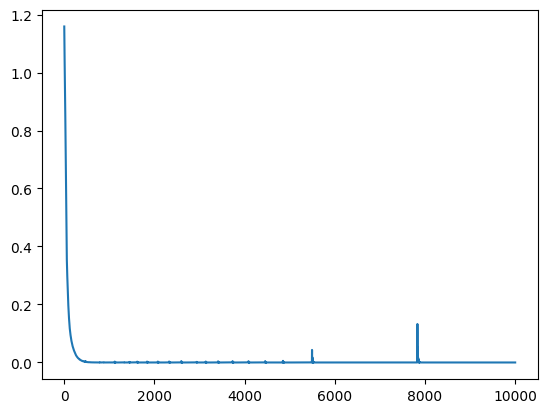

In [120]:
plt.plot(range(niterations), losses)
plt.show()

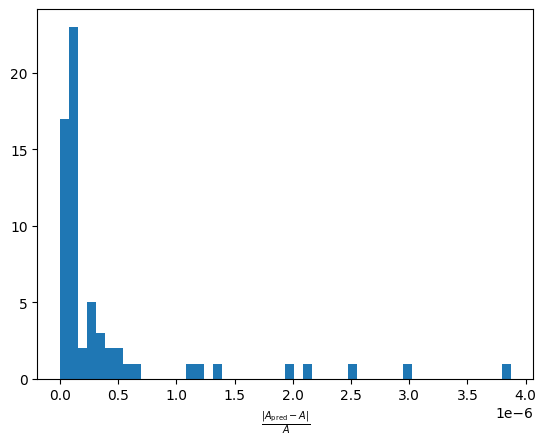

In [121]:
pred = model(x)
diff = torch.abs((pred.detach() - A) / A).cpu().numpy()

plt.hist(diff, bins=50)
plt.xlabel(r"$\frac{|A_\mathrm{pred}-A|}{A}$")
plt.show()

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [136]:
def train_and_evaluate_model(model, train_loader, val_loader,
                             num_epochs=10, learning_rate=1e-3,
                             print_every=20):
    """
    Train and evaluate a regression model.

    Parameters:
    - model: The regression model to be trained and evaluated.
    - train_loader: DataLoader for the training dataset.
    - val_loader: DataLoader for the validation dataset.
    - num_epochs: Number of training epochs.
    - learning_rate: Learning rate for the optimizer
    - print_every: Number of epochs after which to print the loss.


    Returns:
    - trained_model: The trained regression model.
    - train_losses: List of training losses for each epoch.
    - val_losses: List of validation losses for each epoch.
    """

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        epoch_train_loss = 0.0
        for batch_data in train_loader:
            inputs,targets = batch_data

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        # Validation
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for batch_data in val_loader:
              inputs,targets = batch_data
              outputs = model(inputs)
              loss = criterion(outputs, targets)

              epoch_val_loss += loss.item()

        # Average losses
        avg_train_loss = epoch_train_loss / len(train_loader)
        avg_val_loss = epoch_val_loss / len(val_loader)

        # Print losses after every 'print_every' epochs
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

    return train_losses, val_losses



### Training with only one batch:

In [137]:
### extract the first_batch
# and create dataloaders for them
train_loader_iter = iter(trn_dataloader)
trn_first_batch, amp_first_batch = next(train_loader_iter)
trn_dataset_first_batch = amp_dataset(trn_first_batch, amp_first_batch)
trn_first_batch_dataloader=torch.utils.data.DataLoader(trn_dataset_first_batch,
                                                       batch_size=1,
                                                       shuffle=False)


val_loader_iter=iter(val_dataloader)
val_first_batch,amp_val_first=next(val_loader_iter)
val_dataset_first_batch = amp_dataset(val_first_batch, amp_val_first)
val_first_batch_dataloader=torch.utils.data.DataLoader(val_dataset_first_batch,
                                                       batch_size=1,
                                                       shuffle=False)

In [138]:
trn_first_batch.shape, amp_first_batch.shape

(torch.Size([64, 20]), torch.Size([64, 1]))

In [139]:
#instantiate the model
model_1=amp_net(hdn_dim=32, ipt_dim=20, opt_dim=1, n_layers=2)

# train the model
trn_loss_1, val_loss_1=train_and_evaluate_model(model=model_1,
                                                train_loader=trn_first_batch_dataloader,
                                                val_loader=val_first_batch_dataloader,
                             num_epochs=100, learning_rate=0.001,
                             print_every=10)

Epoch 10/100, Train Loss: 0.3173370190152127, Val Loss: 1.0560246312725212
Epoch 20/100, Train Loss: 0.22626347337433117, Val Loss: 1.029443816277535
Epoch 30/100, Train Loss: 0.1824233348048665, Val Loss: 0.9784742928100867
Epoch 40/100, Train Loss: 0.15465321489773487, Val Loss: 0.9926150225016954
Epoch 50/100, Train Loss: 0.13689755969517137, Val Loss: 0.9927492695358069
Epoch 60/100, Train Loss: 0.12249703561834568, Val Loss: 0.9957879587691423
Epoch 70/100, Train Loss: 0.10869986632634898, Val Loss: 0.9698784436041024
Epoch 80/100, Train Loss: 0.09605051212830062, Val Loss: 0.9602385958214654
Epoch 90/100, Train Loss: 0.08523205601953876, Val Loss: 0.9657057678732599
Epoch 100/100, Train Loss: 0.07438033811019218, Val Loss: 0.9422772597397397


In [132]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, val_losses):
    """
    Plot training and validation losses.

    Parameters:
    - train_losses: List of training losses for each epoch.
    - val_losses: List of validation losses for each epoch.

    Returns:
    - None (displays the plot).
    """
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.yscale("log")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


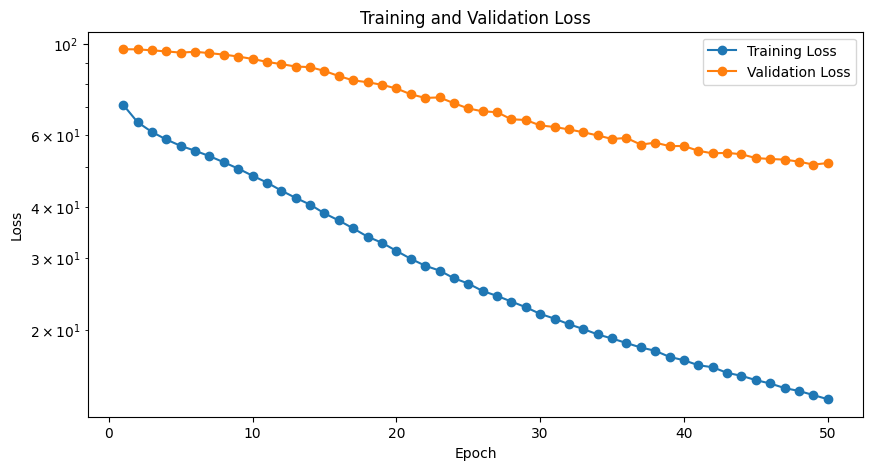

In [133]:
plot_loss(trn_loss_1, val_loss_1)

### Training on the entire dataset

In [134]:
model=amp_net(hdn_dim=32, ipt_dim=20, opt_dim=1, n_layers=4)

# train the model
trn_loss, val_loss=train_and_evaluate_model(model=model,
                                                train_loader=trn_dataloader,
                                                val_loader=val_dataloader,
                             num_epochs=100, learning_rate=0.001,
                             print_every=10)

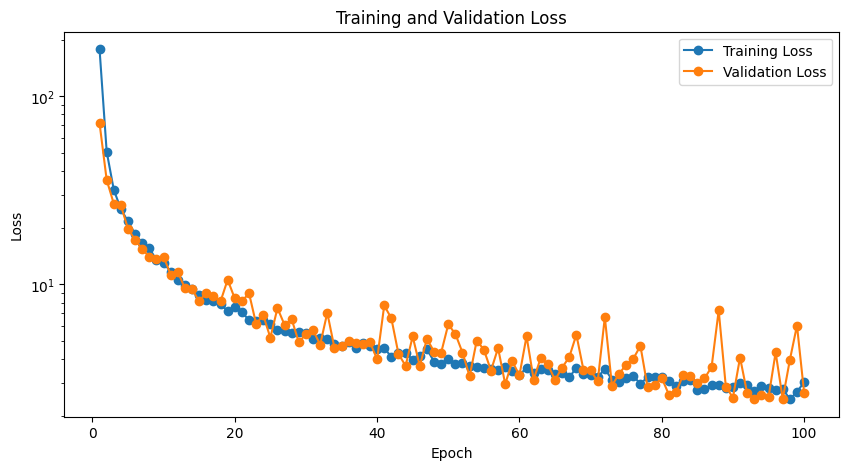

In [135]:
plot_loss(trn_loss, val_loss)

In [143]:
### make predictions:
def make_predictions(model,tst_dataloader, mean_A, std_A):
  predsp=np.array([])
  with torch.no_grad():
    for x, y in tst_dataloader:
        pred = model(x)
        predsp = np.append(predsp, pred)

  # undo preprocessing
  preds = undo_preprocess_A(predsp, mean_A, std_A)
  return preds

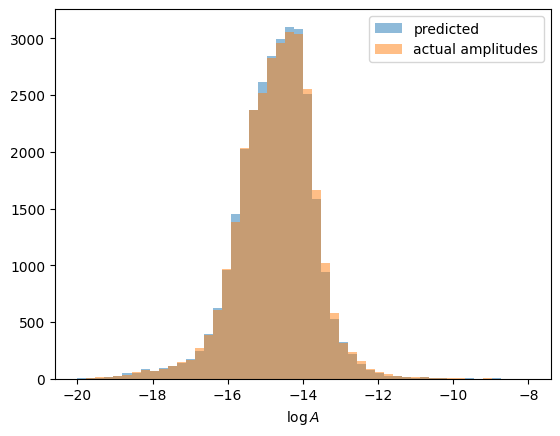

In [146]:
### plot predictions vs actual amplitude values
preds=make_predictions(model,tst_dataloader,mean_A,std_A)
plt.hist(np.log(preds), alpha=.5, range=(-20, -8), bins=50,label="predicted")
plt.hist(np.log(tst_amp), alpha=.5, range=(-20, -8), bins=50,label="actual amplitudes")
plt.xlabel(r"$\log A$")
plt.legend()
plt.show()

### Left to do: Regularisation methods:

1. Early stopping
2. drop out
3. Weight decay

# -------Everything below is not really important-----------

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, input_data, transform=None):
        self.input_data = input_data#torch.tensor(input_data, dtype=torch.float32)
        self.transform = transform
        self.max_original_values = []

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, idx):
        x = self.input_data[idx]

        # Apply the transformation if provided
        if self.transform:
            x, max_original_value = self.transform(x)
            self.max_original_values.append(max_original_value)

        return x

class CustomTransform:
    def __call__(self, sample):
        max_original_value = torch.max(sample)
        normalized_sample = sample / max_original_value
        return normalized_sample, max_original_value

# Function for inverse transformation
def inverse_transform_function(transformed_sample, max_original_value):
    return transformed_sample * max_original_value

# Convert trn_dat to tensor
trn_dat_tensor = torch.tensor(trn_dat, dtype=torch.float32)
val_dat_tensor=torch.tensor(val_dat, dtype=torch.float32)
test_dat_tensor=torch.tensor(tst_dat, dtype=torch.float32)

# Create instances of the preprocessing transformation
transform = CustomTransform()

# Apply the transformation to the training dataset
train_dataset = CustomDataset(trn_dat_tensor, transform=transform)
val_dataset= CustomDataset(val_dat_tensor,transform=transform)
test_dataset= CustomDataset(test_dat_tensor, transform=transform)

### flattening the datasets:
flattened_trn_data = train_dataset.input_data.view(train_dataset.input_data.size(0), -1)
flattened_val_data = val_dataset.input_data.view(val_dataset.input_data.size(0), -1)
flattened_tst_data = test_dataset.input_data.view(test_dataset.input_data.size(0), -1)

# Print the shapes of the flattened datasets
print("Flattened Training Data Shape:", flattened_trn_data.shape)
print("Flattened Validation Data Shape:", flattened_val_data.shape)
print("Flattened Test Data Shape:", flattened_tst_data.shape)

# Set the batch size for DataLoader
batch_size = 64
train_loader = DataLoader(flattened_trn_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(flattened_val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(flattened_tst_data, batch_size=batch_size, shuffle=True)

# # Create DataLoader instances for training dataset
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader=DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
# test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



print("original tensor:");print(trn_dat_tensor)
print("transformed tensor:");print(train_dataset[:,:,:])




# Example of using the transformed dataset
# sample_idx = 0
# transformed_sample_x = train_dataset[sample_idx]
# print("Transformed Sample (X):", transformed_sample_x)
# # Now, `transformed_sample_x` contains the transformed data

# # Access the max_original value stored during transformation
# max_original_value = train_dataset.max_original_values[sample_idx]
# print("train_dataset.max_original_values[sample_idx]:",{max_original_value})

# # Example of inverse transformation
# original_sample_x = inverse_transform_function(transformed_sample_x, max_original_value)
# # Now, `original_sample_x` contains the original data

# print("Original Sample (X):", original_sample_x)

# # Repeat the same process for amplitude data
# trn_amp_tensor = torch.tensor(trn_amp, dtype=torch.float32)
# transformed_sample_amp, max_original_value_amp = transform(trn_amp_tensor)
# original_sample_amp = inverse_transform_function(transformed_sample_amp, max_original_value_amp)

# print("\nTransformed Sample (Amplitude):", transformed_sample_amp)
# print("Original Sample (Amplitude):", original_sample_amp)


Flattened Training Data Shape: torch.Size([30000, 20])
Flattened Validation Data Shape: torch.Size([30000, 20])
Flattened Test Data Shape: torch.Size([30000, 20])
original tensor:
tensor([[[ 102.1582,    0.0000,    0.0000,  102.1582],
         [  32.1274,    0.0000,    0.0000,  -32.1274],
         [  70.0425,   43.8850,  -16.0890,   52.1652],
         [  42.5017,  -25.8475,   28.2103,   18.5063],
         [  21.7414,  -18.0375,  -12.1213,   -0.6407]],

        [[ 226.6436,    0.0000,    0.0000,  226.6436],
         [ 127.6460,    0.0000,    0.0000, -127.6460],
         [ 139.2335,  -42.5440,  111.8684,   71.1439],
         [ 116.2170,   96.0659,  -33.7051,   56.0509],
         [  98.8392,  -53.5219,  -78.1633,  -28.1971]],

        [[ 194.7279,    0.0000,    0.0000,  194.7279],
         [  26.0684,    0.0000,    0.0000,  -26.0684],
         [ 113.8336,  -53.7383,   -2.2083,  100.3265],
         [  75.6091,   35.4345,  -22.6472,   62.8350],
         [  31.3536,   18.3038,   24.8554,    

In [ ]:
train_dataset[:].shape, trn_dat_tensor.shape, torch.max(trn_dat_tensor)

(torch.Size([30000, 5, 4]), torch.Size([30000, 5, 4]), tensor(693.7130))

In [ ]:
## repeating the task for the amplitude dataset:
trn_amp_tensor = torch.tensor(trn_amp, dtype=torch.float32)
transformed_trn_amp_tensor, max_original_value_amp_trn = transform(trn_amp_tensor)
print("trn_amp_tensor is:");print(trn_amp_tensor)
print("transformed trn_amp_tensor is:");print(transformed_trn_amp_tensor)

test_amp_tensor = torch.tensor(tst_amp, dtype=torch.float32)
transformed_test_amp_tensor, max_original_value_amp_test = transform(test_amp_tensor)

val_amp_tensor = torch.tensor(val_amp, dtype=torch.float32)
transformed_val_amp_tensor, max_original_value_amp_val = transform(val_amp_tensor)

trn_amp_tensor is:
tensor([9.1859e-07, 5.6096e-08, 6.2588e-07,  ..., 5.3558e-07, 6.4671e-07,
        7.1533e-06])
transformed trn_amp_tensor is:
tensor([8.1832e-04, 4.9973e-05, 5.5756e-04,  ..., 4.7711e-04, 5.7611e-04,
        6.3725e-03])


In [ ]:
transformed_trn_amp_tensor.shape

torch.Size([30000])

In [ ]:
### Now we need to concatenate the data so that we can use it for our next task.

### Task-2-(c)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train_and_evaluate_model(model, train_loader, val_loader, target_tensor, val_target_tensor, num_epochs=10, learning_rate=1e-3,print_every=20):
    """
    Train and evaluate a regression model.

    Parameters:
    - model: The regression model to be trained and evaluated.
    - train_loader: DataLoader for the training dataset.
    - val_loader: DataLoader for the validation dataset.
    - target_tensor: Target tensor for the training regression task.
    - val_target_tensor: Target tensor for the validation regression task.
    - num_epochs: Number of training epochs.
    - learning_rate: Learning rate for the optimizer
    - print_every: Number of epochs after which to print the loss.


    Returns:
    - trained_model: The trained regression model.
    - train_losses: List of training losses for each epoch.
    - val_losses: List of validation losses for each epoch.
    """

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        epoch_train_loss = 0.0
        for batch_data in train_loader:
            inputs = batch_data
            targets = target_tensor  # Use the provided target tensor

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        # Validation
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for batch_data in val_loader:
                inputs = batch_data
                targets = val_target_tensor  # Use the provided validation target tensor

                outputs = model(inputs)
                loss = criterion(outputs, targets)

                epoch_val_loss += loss.item()

        # Average losses
        avg_train_loss = epoch_train_loss / len(train_loader)
        avg_val_loss = epoch_val_loss / len(val_loader)

        # Print losses after every 'print_every' epochs
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

    return model, train_losses, val_losses

# Example usage:
# trained_model, train_losses, val_losses = train_and_evaluate_model(model, train_loader, val_loader, transformed_trn_amp_tensor, transformed_val_amp_tensor, num_epochs=10)


In [ ]:
tst_dat.shape,trn_dat.shape,val_dat.shape, trn_amp_tensor.shape

((30000, 5, 4), (30000, 5, 4), (30000, 5, 4), torch.Size([30000]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train_and_evaluate_model(model, train_loader, val_loader, num_epochs=10, learning_rate=1e-3, print_every=20):
    """
    Train and evaluate a regression model.

    Parameters:
    - model: The regression model to be trained and evaluated.
    - train_loader: DataLoader for the training dataset.
    - val_loader: DataLoader for the validation dataset.
    - num_epochs: Number of training epochs.
    - learning_rate: Learning rate for the optimizer
    - print_every: Number of epochs after which to print the loss.

    Returns:
    - trained_model: The trained regression model.
    - train_losses: List of training losses for each epoch.
    - val_losses: List of validation losses for each epoch.
    """

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        epoch_train_loss = 0.0
        for batch_data in train_loader:
            inputs, targets = batch_data

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        # Validation
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for batch_data in val_loader:
                inputs, targets = batch_data

                outputs = model(inputs)
                loss = criterion(outputs, targets)

                epoch_val_loss += loss.item()

        # Average losses
        avg_train_loss = epoch_train_loss / len(train_loader)
        avg_val_loss = epoch_val_loss / len(val_loader)

        # Print losses after every 'print_every' epochs
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

    return model, train_losses, val_losses
